In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
task_metrics = {'chest': 'mAP', 'colon': 'Accuracy', 'endo': 'mAP'}

In [3]:
def evaluate(task="chest"):
    directory = f"work_dirs/densenet121_4xb256_in1k-{task}/"
    
    result_folder_list = os.listdir(directory)
    
    result_folder_list = [i for i in result_folder_list if i[:len('20240413')] == '20240415']
    
    X_list = []
    Y_list = []
    
    for folder in result_folder_list:
        result_file_list = os.listdir(f"work_dirs/densenet121_4xb256_in1k-{task}/{folder}/")
        
#         print(result_file_list)
        
#         result_json = [i for i in result_file_list if i[-len("json"):]=="json"][0]
        
#         print(result_json)
        
#         with open(f"work_dirs/densenet121_4xb256_in1k-{task}/{folder}/{result_json}", 'r') as file:
#             result_json = json.loads(file.read())
        
#         print(result_json)
        
        result_log = [i for i in result_file_list if i[-len("log"):]=="log"][0]
        
#         print(result_log)
        
        with open(f"work_dirs/densenet121_4xb256_in1k-{task}/{folder}/{result_log}", 'r') as file:
            result_log = file.readlines()
        
        
#         print(result_log)

        x = int(result_log[-2].split(' ')[-1].split('/')[-1].replace('epoch_', '').replace('.pth\n', ''))
        y = float(result_log[-1].split(' ')[-7])
        # print(x, end=', ')
        # print(y)
        
        X_list.append(x)
        Y_list.append(y)
        
    df_tmp = pd.DataFrame({'Epochs': X_list, f"{task_metrics[task]} (%)": Y_list})
    
    epoch = 0
    while True:
        if epoch+10 < df_tmp.index.values[-1]:
            display(df_tmp.T.loc[:, epoch:epoch+9])
            epoch += 10
        else:
            display(df_tmp.T.loc[:, epoch:])
            break
    
    
    plt.figure(figsize=(15,8))
    ax = sns.lineplot(data=df_tmp, x='Epochs', y=f"{task_metrics[task]} (%)")
    plt.title(f"Metrics over epochs -- {task.upper()}") # , fontsize=
    plt.xlabel('Epochs')
    plt.ylabel(f"{task_metrics[task]} (%)")
    
#     #adding the text labels
#     rects = ax.patches
#     labels = df_tmp['Y_list'].values
#     for rect, label in zip(rects, labels):
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12)
    
    plt.show()
        
#         break
    # print(result_folder_list)

,0,1,2,3,4,5,6,7,8,9
Epochs,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000,10.0000
mAP (%),14.0923,13.9705,15.4188,16.2481,14.9165,15.1161,16.0359,15.7086,15.4987,15.9153


,10,11,12,13,14,15,16,17,18,19
Epochs,11.0000,12.0000,13.0000,14.0000,15.0000,16.000,17.0000,18.0000,19.0000,20.000
mAP (%),16.9145,15.5769,18.3793,18.7341,18.8241,20.858,21.5239,18.6044,18.8445,22.604


,20,21,22,23,24,25,26,27,28,29
Epochs,21.0000,22.0000,23.0000,24.0000,25.0000,26.0000,27.0000,28.0000,29.0000,30.0000
mAP (%),21.2405,23.3758,23.2395,23.3297,22.2515,22.9215,24.2437,22.5878,22.6971,23.4793


,30,31,32,33,34,35,36,37,38,39
Epochs,31.0000,32.0000,33.0000,34.0000,35.0000,36.0000,37.0000,38.0000,39.0000,40.0000
mAP (%),23.5776,23.4275,23.8062,23.7865,24.1725,24.0034,24.3488,24.6332,24.5994,25.0562


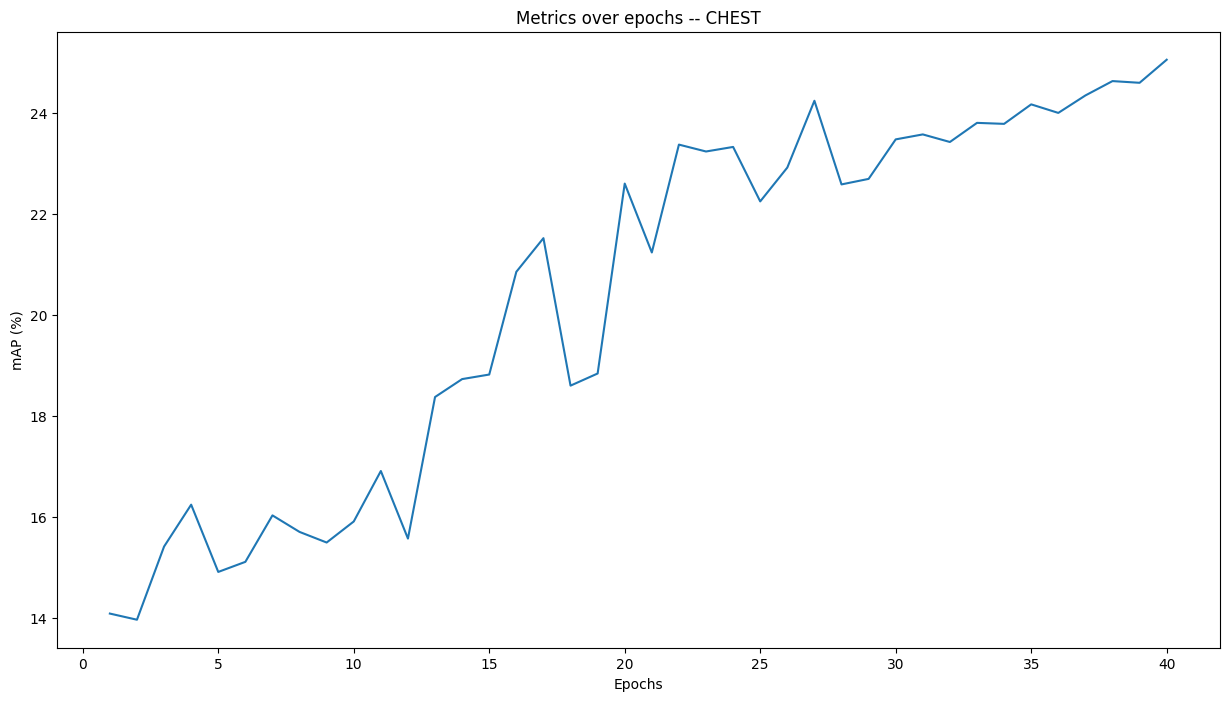

In [4]:
evaluate("chest")

,0,1,2,3,4,5,6,7,8,9
Epochs,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000,10.0000
Accuracy (%),64.8099,32.3607,75.5084,78.8683,84.8806,87.4447,90.2741,88.9478,91.4235,90.4509


,10,11,12,13,14,15,16,17,18,19
Epochs,11.0000,12.000,13.0000,14.0000,15.0000,16.0000,17.0000,18.0000,19.0000,20.0000
Accuracy (%),89.9204,90.893,89.1247,85.6764,91.2467,88.5057,93.1919,91.6003,90.3625,93.2803


,20,21,22,23,24,25,26,27,28,29
Epochs,21.0000,22.0000,23.0000,24.000,25.0000,26.0000,27.000,28.0000,29.0000,30.0000
Accuracy (%),90.0973,92.0424,91.2467,94.695,90.0973,91.5119,95.137,95.3139,93.3687,80.5482


,30,31,32,33,34,35,36,37,38,39
Epochs,31.0000,32.0000,33.0000,34.0000,35.000,36.0000,37.000,38.0000,39.000,40.0000
Accuracy (%),95.6675,95.5791,95.5791,95.5791,95.137,95.4023,95.756,93.9876,93.015,95.2255


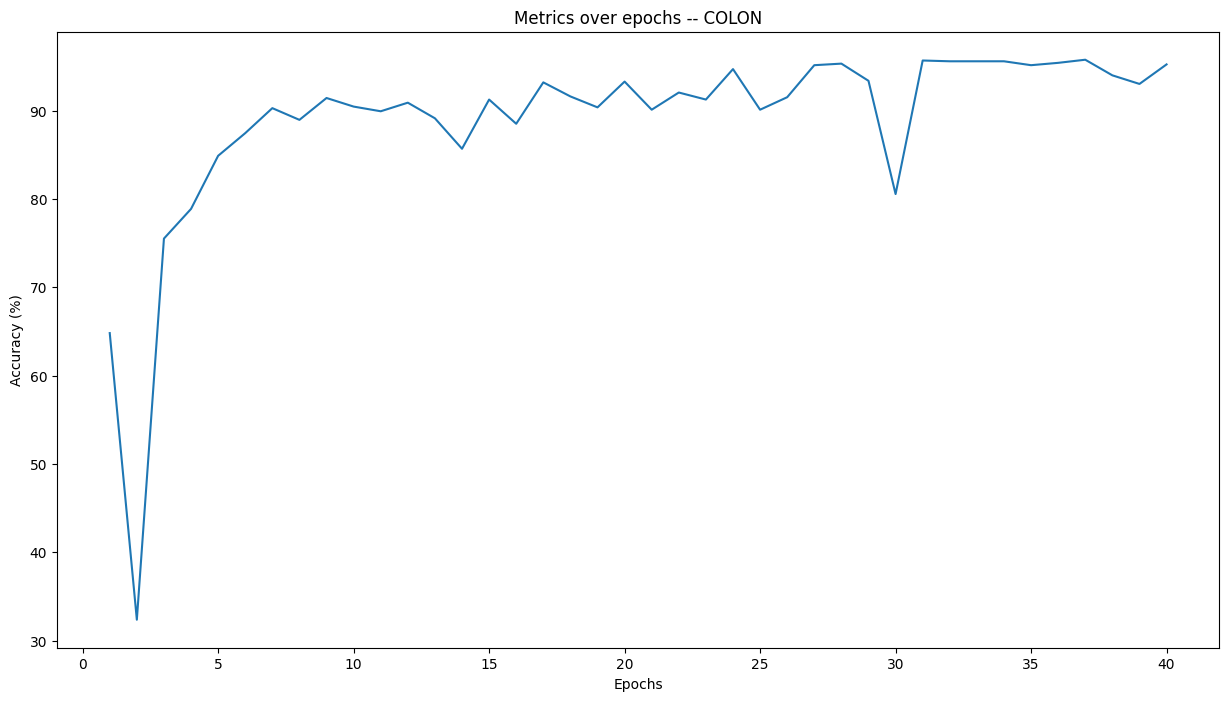

In [5]:
evaluate("colon")

,0,1,2,3,4,5,6,7,8,9
Epochs,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000,10.0000
mAP (%),33.9335,32.7033,32.7033,33.8798,36.7521,42.6696,42.0675,44.6326,46.6983,49.9349


,10,11,12,13,14,15,16,17,18,19
Epochs,11.0000,12.0000,13.0000,14.0000,15.0000,16.0000,17.0000,18.0000,19.0000,20.0000
mAP (%),51.8748,49.7963,51.7088,51.9866,52.5154,50.2276,51.4358,56.9755,53.3753,53.2951


,20,21,22,23,24,25,26,27,28,29
Epochs,21.000,22.0000,23.0000,24.0000,25.0000,26.000,27.0000,28.0000,29.0000,30.0000
mAP (%),54.253,56.0103,52.4192,53.8154,54.8904,55.042,52.9618,54.2713,57.0209,55.6179


,30,31,32,33,34,35,36,37,38,39
Epochs,31.0000,32.000,33.0000,34.0000,35.0000,36.0000,37.0000,38.0000,39.0000,40.0000
mAP (%),57.0235,57.906,57.6213,58.3124,58.4719,57.3342,57.4276,57.2375,57.7757,57.5705


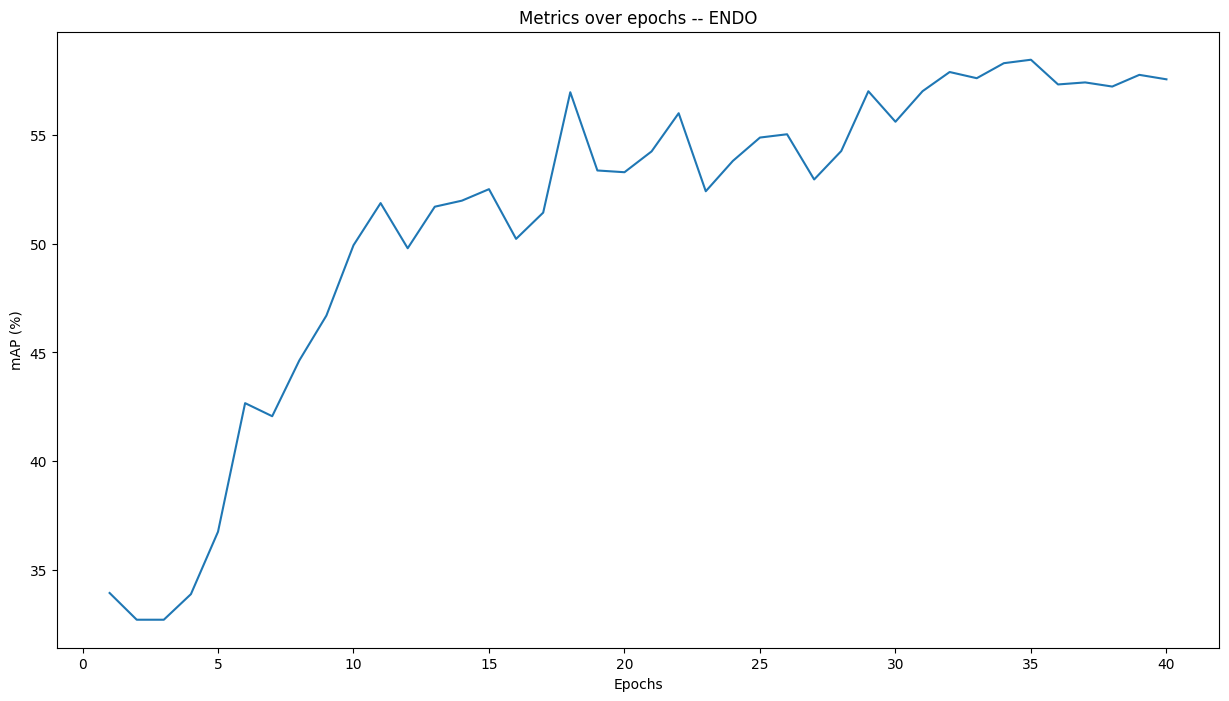

In [6]:
evaluate("endo")